# Data Loading & Preprocessing

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


df = pd.read_csv("C:\\Users\\saire\\OneDrive\\Desktop\\Git\\Data\\archive\\IMDB_Dataset.csv")


def clean_text(text):
    text = re.sub('<br />', ' ', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)


df['cleaned_reviews'] = df['review'].apply(clean_text)

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


X_train, X_test, y_train, y_test = train_test_split(df['cleaned_reviews'], df['sentiment'], test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


# Exploratory Data Analysis (EDA) and Visaulization

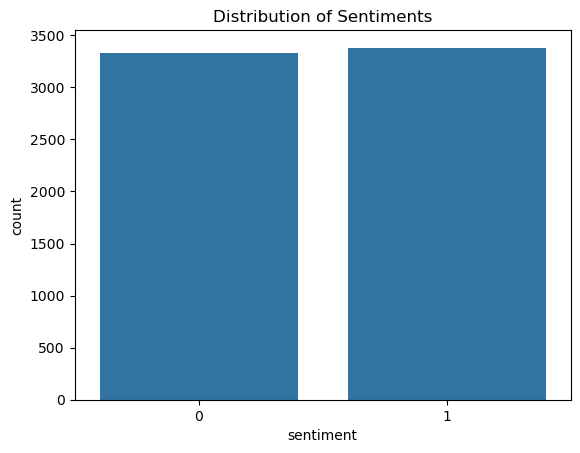

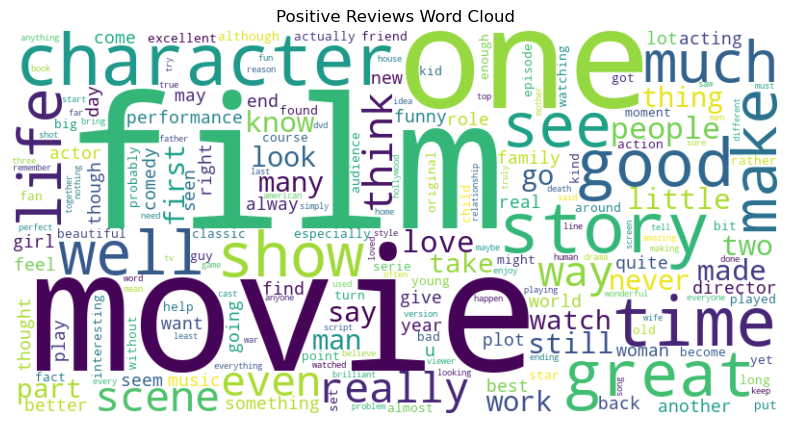

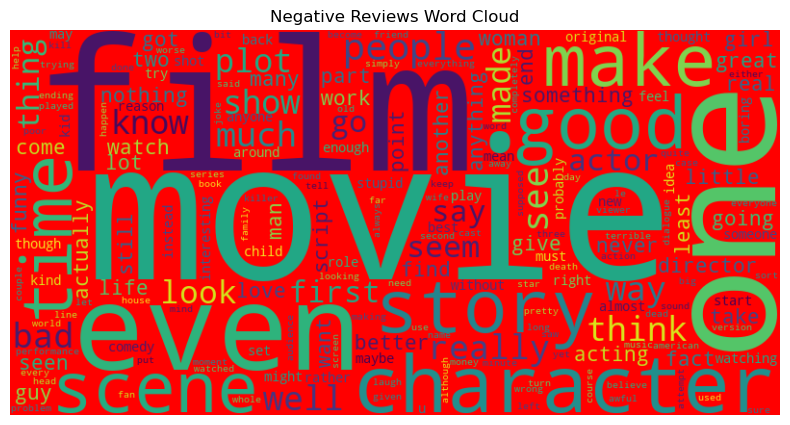

In [4]:

sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()


positive_reviews = df[df['sentiment'] == 1]['cleaned_reviews'] # wordclouds
negative_reviews = df[df['sentiment'] == 0]['cleaned_reviews']

positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()


# Multiple Machine Learning Model Training

In [6]:
#multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    y_pred_proba = model.predict_proba(X_test_vect)[:, 1]
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_proba)}')
    print(classification_report(y_test, y_pred))
    print('\n')


Model: Logistic Regression
Accuracy: 0.8683035714285714
ROC-AUC: 0.9417409700608088
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       685
           1       0.85      0.89      0.87       659

    accuracy                           0.87      1344
   macro avg       0.87      0.87      0.87      1344
weighted avg       0.87      0.87      0.87      1344



Model: Naive Bayes
Accuracy: 0.8578869047619048
ROC-AUC: 0.9265487411805103
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       685
           1       0.85      0.87      0.86       659

    accuracy                           0.86      1344
   macro avg       0.86      0.86      0.86      1344
weighted avg       0.86      0.86      0.86      1344



Model: Support Vector Machine
Accuracy: 0.8735119047619048
ROC-AUC: 0.943253990230719
              precision    recall  f1-score   support

           0       0.90      0.85      0.

# Hyperparameters for the Models

In [ ]:

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search with SVC
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=3, scoring='roc_auc')

# Model on the training data
grid_search.fit(X_train_vect, y_train)
print('Best parameters found:', grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predictions on the test data
y_pred = best_model.predict(X_test_vect)
y_pred_proba = best_model.predict_proba(X_test_vect)[:, 1]

# Print evaluation metrics
print(f'Best SVM Model Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Best SVM Model ROC-AUC: {roc_auc_score(y_test, y_pred_proba)}')
print(classification_report(y_test, y_pred))
